In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 100.
T = 100.
Nx = 500
Nt = 10_000

alpha = 1.0
dx = L/Nx
dt = T/Nt
F = alpha*dt/dx*dx

x = np.linspace(0, L, Nx+1)

w0 = np.zeros(Nx+1)
w0[Nx//2:Nx//2+Nx//10] = np.sin(2.0 * np.pi * (x[Nx//2:Nx//2+Nx//10] - x[Nx//2]) / (L/5) )

In [2]:
def crank_nicolson(x, F):
    A_diag = (1+F)*np.ones(x.shape[0])
    B_diag = (1-F)*np.ones(x.shape[0])
    ldiag = (F/2)*np.ones(x.shape[0]-1)
    
    A = np.diag(A_diag) + np.diag(-ldiag, -1) + np.diag(-ldiag, 1)
    B = np.diag(B_diag) + np.diag(ldiag, -1) + np.diag(ldiag, 1)

    return np.matmul(np.linalg.inv(A), B) @ x        

In [5]:
%time crank_nicolson(x, F)

CPU times: user 312 ms, sys: 55.1 ms, total: 367 ms
Wall time: 71.8 ms


array([1.98024655e-03, 2.00009803e-01, 4.00000049e-01, 6.00000000e-01,
       8.00000000e-01, 1.00000000e+00, 1.20000000e+00, 1.40000000e+00,
       1.60000000e+00, 1.80000000e+00, 2.00000000e+00, 2.20000000e+00,
       2.40000000e+00, 2.60000000e+00, 2.80000000e+00, 3.00000000e+00,
       3.20000000e+00, 3.40000000e+00, 3.60000000e+00, 3.80000000e+00,
       4.00000000e+00, 4.20000000e+00, 4.40000000e+00, 4.60000000e+00,
       4.80000000e+00, 5.00000000e+00, 5.20000000e+00, 5.40000000e+00,
       5.60000000e+00, 5.80000000e+00, 6.00000000e+00, 6.20000000e+00,
       6.40000000e+00, 6.60000000e+00, 6.80000000e+00, 7.00000000e+00,
       7.20000000e+00, 7.40000000e+00, 7.60000000e+00, 7.80000000e+00,
       8.00000000e+00, 8.20000000e+00, 8.40000000e+00, 8.60000000e+00,
       8.80000000e+00, 9.00000000e+00, 9.20000000e+00, 9.40000000e+00,
       9.60000000e+00, 9.80000000e+00, 1.00000000e+01, 1.02000000e+01,
       1.04000000e+01, 1.06000000e+01, 1.08000000e+01, 1.10000000e+01,
      

In [82]:
def simulasi(x, F, Nt):
    for i in range(Nt):
        x = crank_nicolson(x, F)
    return x

In [84]:
temp_sim = simulasi(w0, F, Nt)

array([2.79883243e-65, 8.99409020e-65, 2.60488002e-64, 7.43618712e-64,
       2.11335801e-63, 5.98645614e-63, 1.69043884e-62, 4.75845850e-62,
       1.33526637e-61, 3.73509083e-61, 1.04150842e-60, 2.89500601e-60,
       8.02154302e-60, 2.21556661e-59, 6.09995780e-59, 1.67409708e-58,
       4.57976185e-58, 1.24884990e-57, 3.39452748e-57, 9.19701242e-57,
       2.48375754e-56, 6.68595140e-56, 1.79392972e-55, 4.79769259e-55,
       1.27891234e-54, 3.39802896e-54, 8.99886795e-54, 2.37530696e-53,
       6.24912499e-53, 1.63863725e-52, 4.28259603e-52, 1.11554884e-51,
       2.89616813e-51, 7.49392183e-51, 1.93259676e-50, 4.96725576e-50,
       1.27242285e-49, 3.24849745e-49, 8.26544408e-49, 2.09594026e-48,
       5.29684293e-48, 1.33406569e-47, 3.34854152e-47, 8.37623659e-47,
       2.08810998e-46, 5.18758699e-46, 1.28434413e-45, 3.16882164e-45,
       7.79131828e-45, 1.90904969e-44, 4.66136406e-44, 1.13421315e-43,
       2.75016376e-43, 6.64509199e-43, 1.59999398e-42, 3.83890124e-42,
      

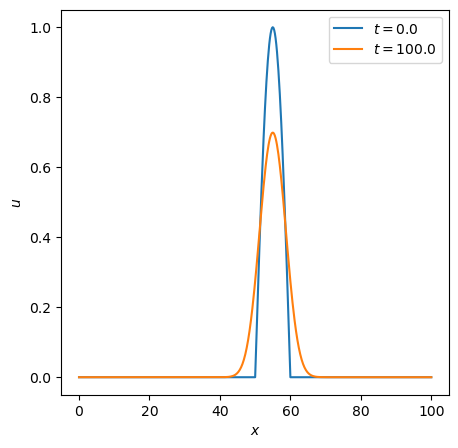

In [87]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')

ax.plot(x, w0, label='$t = 0.0$')
ax.plot(x, temp_sim, label=f'$t = {T}$')

ax.legend()
plt.show()